<a href="https://colab.research.google.com/github/yaramirezte/TelecomX_LATAM-Parte-2/blob/main/TelecomX_LATAM_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Preparación de los Datos


## Extracción del Archivo Tratado

In [83]:
import pandas as pd

In [84]:
url = "https://raw.githubusercontent.com/yaramirezte/TelecomX_LATAM-Parte-2/refs/heads/main/data/datos_tratados.csv"

df = pd.read_csv(url)

df.head()

,ID_Cliente,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Tipo_Internet,...,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios,Segmento_Gasto_Diario,Cantidad_Servicios
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,One year,1,Mailed check,65.6,593.30,2.19,Medium,4
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00,Medium,3
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46,Medium,2
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27,High,5
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80,High,3


In [85]:
df.describe()

,Evasion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Factura_Digital,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios,Cantidad_Servicios
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158675,3.362914
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003088,2.062031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.180000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.340000,3.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.990000,5.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000,8.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7043 non-null   object 
 1   Evasion                 7043 non-null   int64  
 2   Genero                  7043 non-null   object 
 3   Adulto_Mayor            7043 non-null   int64  
 4   Tiene_Pareja            7043 non-null   int64  
 5   Tiene_Dependientes      7043 non-null   int64  
 6   Antiguedad_Meses        7043 non-null   int64  
 7   Servicio_Telefonico     7043 non-null   int64  
 8   Multiples_Lineas        7043 non-null   int64  
 9   Tipo_Internet           7043 non-null   object 
 10  Seguridad_Online        7043 non-null   int64  
 11  Backup_Online           7043 non-null   int64  
 12  Proteccion_Dispositivo  7043 non-null   int64  
 13  Soporte_Tecnico         7043 non-null   int64  
 14  Streaming_TV            7043 non-null   

## Eliminación de Columnas Irrelevantes

In [87]:
df.columns

Index(['ID_Cliente', 'Evasion', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja',
       'Tiene_Dependientes', 'Antiguedad_Meses', 'Servicio_Telefonico',
       'Multiples_Lineas', 'Tipo_Internet', 'Seguridad_Online',
       'Backup_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
       'Factura_Digital', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales',
       'Cargos_Diarios', 'Segmento_Gasto_Diario', 'Cantidad_Servicios'],
      dtype='object')

In [88]:
if 'ID_Cliente' in df.columns:
  df = df.drop(columns=['ID_Cliente'])

In [89]:
df.columns

Index(['Evasion', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja',
       'Tiene_Dependientes', 'Antiguedad_Meses', 'Servicio_Telefonico',
       'Multiples_Lineas', 'Tipo_Internet', 'Seguridad_Online',
       'Backup_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
       'Factura_Digital', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales',
       'Cargos_Diarios', 'Segmento_Gasto_Diario', 'Cantidad_Servicios'],
      dtype='object')

Se eliminó la columna `ID_Cliente` por tratarse de un identificador único sin valor predictivo.
Este tipo de variables no contribuye al modelo y puede introducir ruido o sobreajuste.

## Encoding

In [90]:
df['Evasion'].value_counts()

,count
Evasion,
0,5174
1,1869


In [91]:
y = df['Evasion']
X = df.drop(columns=['Evasion'])

In [92]:
X.dtypes

,0
Genero,object
Adulto_Mayor,int64
Tiene_Pareja,int64
Tiene_Dependientes,int64
Antiguedad_Meses,int64
Servicio_Telefonico,int64
Multiples_Lineas,int64
Tipo_Internet,object
Seguridad_Online,int64
Backup_Online,int64


In [93]:
# Transforma todas las variables categóricas dentro de X a formato numérico
X = pd.get_dummies(X, drop_first=True) # drop_first=True Evita la trampa de multicolinealidad

In [94]:
X.head()

,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,...,Tipo_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check,Segmento_Gasto_Diario_Low,Segmento_Gasto_Diario_Medium,Segmento_Gasto_Diario_Very High,Segmento_Gasto_Diario_Very Low
0,0,1,1,9,1,0,0,1,0,1,...,False,True,False,False,False,True,False,True,False,False
1,0,0,0,9,1,1,0,0,0,0,...,False,False,False,False,False,True,False,True,False,False
2,0,0,0,4,1,0,0,0,1,0,...,False,False,False,False,True,False,False,True,False,False
3,1,1,0,13,1,0,0,1,1,0,...,False,False,False,False,True,False,False,False,False,False
4,1,1,0,3,1,0,0,0,0,1,...,False,False,False,False,False,True,False,False,False,False


In [95]:
X.shape

(7043, 29)

In [96]:
X = X.astype(int) # convertirlas a 0 y 1

In [97]:
X.sample(5)

,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,...,Tipo_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check,Segmento_Gasto_Diario_Low,Segmento_Gasto_Diario_Medium,Segmento_Gasto_Diario_Very High,Segmento_Gasto_Diario_Very Low
6465,0,0,0,56,1,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
5022,0,0,0,54,1,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
4770,0,0,0,10,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3005,0,1,0,16,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6317,0,1,0,15,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Adulto_Mayor                         7043 non-null   int64
 1   Tiene_Pareja                         7043 non-null   int64
 2   Tiene_Dependientes                   7043 non-null   int64
 3   Antiguedad_Meses                     7043 non-null   int64
 4   Servicio_Telefonico                  7043 non-null   int64
 5   Multiples_Lineas                     7043 non-null   int64
 6   Seguridad_Online                     7043 non-null   int64
 7   Backup_Online                        7043 non-null   int64
 8   Proteccion_Dispositivo               7043 non-null   int64
 9   Soporte_Tecnico                      7043 non-null   int64
 10  Streaming_TV                         7043 non-null   int64
 11  Streaming_Peliculas                  7043 non-null   int

Se aplicó One-Hot Encoding utilizando `pd.get_dummies()` para transformar las variables categóricas en variables numéricas compatibles con algoritmos de machine learning.

Se utilizó el parámetro `drop_first=True` para evitar multicolinealidad.

## Verificación de la Proporción de Cancelación (Churn)

In [99]:
y.value_counts()

,count
Evasion,
0,5174
1,1869


In [100]:
(y.value_counts(normalize=True) *100).round(2) # Esto devuelve proporciones como 73.46% no cancelaron y 26.54% cancelaron

,proportion
Evasion,
0,73.46
1,26.54


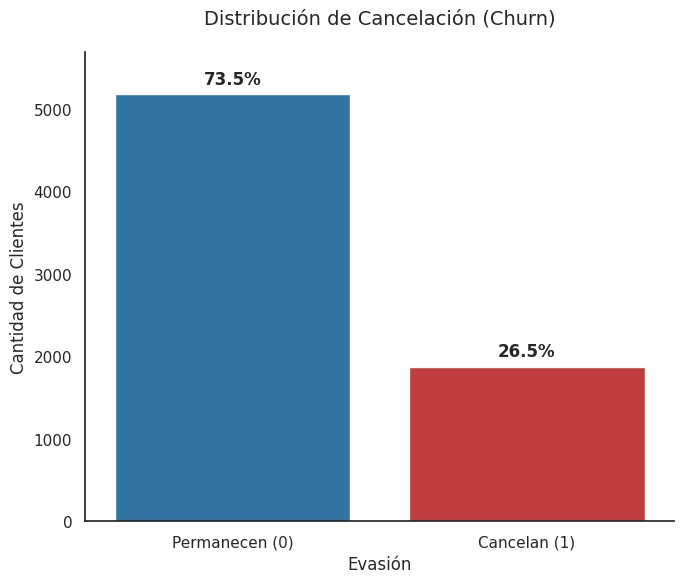

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")
plt.figure(figsize=(7, 6))

# Calculamos los porcentajes
total = len(y)
ax = sns.countplot(x=y, hue=y, palette=['#1f77b4', '#d62728'], legend=False)

# se añade el porcentaje sobre cada barra
for p in ax.patches:
    percentage = f'{(100 * p.get_height() / total):.1f}%'
    x = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()

    ax.annotate(percentage,
                (x, y_pos),
                ha='center', va='bottom',
                fontsize=12,
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribución de Cancelación (Churn)', fontsize=14, pad=20)
plt.xticks([0, 1], ['Permanecen (0)', 'Cancelan (1)'])
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Evasión')

# Ajustamos el límite de Y para que el porcentaje no quede cortado
plt.ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

sns.despine()
plt.tight_layout()
plt.show()

Se observa un desbalance moderado en la variable objetivo (Evasion). Aproximadamente 26.54% de los clientes cancelaron el servicio, mientras que 73.46% permanecieron activos.

## Balanceo de Clases

In [102]:
!pip install imbalanced-learn

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, # 30% prueba
                                                    random_state=42, # reproducibilidad
                                                    stratify=y) # con stratify=y se mantiene la misma proporción en ambos conjuntos


In [104]:
from imblearn.over_sampling import SMOTE
# aplicamos smote
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [105]:
# verificamos el nuevo balance
y_train_bal.value_counts()

,count
Evasion,
0,3622
1,3622


Se aplicó la técnica SMOTE sobre el conjunto de entrenamiento para balancear las clases, generando ejemplos sintéticos de la clase minoritaria. Esto permite que el modelo aprenda mejor los patrones asociados a la cancelación sin afectar el conjunto de prueba.

## Normalización o Estandarización

In [106]:
#scalar
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 2.52522911,  1.29920769, -0.52538183, ..., -0.4639314 ,
        -0.38732908, -0.50219914],
       [-0.39600367,  1.29920769,  1.90337758, ...,  2.15549109,
        -0.38732908, -0.50219914],
       [-0.39600367, -0.76969988, -0.52538183, ..., -0.4639314 ,
        -0.38732908, -0.50219914],
       ...,
       [ 2.52522911, -0.76969988, -0.52538183, ...,  2.15549109,
        -0.38732908, -0.50219914],
       [-0.39600367,  1.29920769, -0.52538183, ..., -0.4639314 ,
         2.58178397, -0.50219914],
       [-0.39600367,  1.29920769,  1.90337758, ..., -0.4639314 ,
        -0.38732908,  1.99124196]])

In [107]:
print(X_train_scaled.mean(axis=0)) # Debería dar valores cercanos a 0
print(X_train_scaled.std(axis=0))  # Debería dar 1

[ 7.84696561e-18  9.41635873e-17  7.84696561e-17  6.27757249e-17
 -2.02059364e-16  2.35408968e-17 -6.27757249e-17  1.56939312e-17
 -4.70817936e-17  4.70817936e-17  7.84696561e-18  5.49287593e-17
 -1.20156661e-16 -7.84696561e-17 -7.84696561e-18  7.45461733e-17
  0.00000000e+00 -4.70817936e-17  6.27757249e-17  6.27757249e-17
  4.70817936e-17 -7.84696561e-17  1.56939312e-17  4.51200522e-17
 -5.49287593e-17  1.76556726e-17  4.70817936e-17  2.74643796e-17
  7.84696561e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


In [108]:
import pandas as pd
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_bal.columns)
X_train_scaled_df.sample(5)

,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,...,Tipo_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check,Segmento_Gasto_Diario_Low,Segmento_Gasto_Diario_Medium,Segmento_Gasto_Diario_Very High,Segmento_Gasto_Diario_Very Low
4664,-0.396004,1.299208,1.903378,-0.185869,0.326801,-0.789842,-0.508657,-0.601802,1.639059,-0.518102,...,-0.441794,-0.419037,-0.444915,2.327294,-0.727487,-0.467224,-0.389447,2.155491,-0.387329,-0.502199
2290,-0.396004,-0.769700,-0.525382,-0.728853,0.326801,-0.789842,-0.508657,1.661675,-0.610106,-0.518102,...,-0.441794,-0.419037,-0.444915,-0.429684,-0.727487,2.140302,-0.389447,2.155491,-0.387329,-0.502199
6651,2.525229,-0.769700,-0.525382,-0.895925,0.326801,-0.789842,-0.508657,-0.601802,-0.610106,-0.518102,...,-0.441794,-0.419037,-0.444915,-0.429684,-0.727487,-0.467224,-0.389447,-0.463931,-0.387329,-0.502199
4517,-0.396004,-0.769700,-0.525382,-1.104766,0.326801,-0.789842,-0.508657,-0.601802,-0.610106,-0.518102,...,-0.441794,-0.419037,-0.444915,-0.429684,1.374594,-0.467224,-0.389447,-0.463931,-0.387329,-0.502199
6347,-0.396004,-0.769700,-0.525382,-1.104766,0.326801,1.266075,-0.508657,-0.601802,-0.610106,-0.518102,...,-0.441794,-0.419037,-0.444915,-0.429684,1.374594,-0.467224,-0.389447,2.155491,-0.387329,-0.502199


In [109]:
# Logistic Regression con datos escalados
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train_bal)

y_pred_log = log_model.predict(X_test_scaled)
y_pred_log

array([0, 0, 1, ..., 1, 0, 0])

In [110]:
# Random Forest sin escalado
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

y_pred_rf = rf_model.predict(X_test)

Se aplicó estandarización únicamente para los modelos sensibles a la escala (Regresión Logística), utilizando StandardScaler ajustado sobre el conjunto de entrenamiento. Los modelos basados en árboles no requieren este preprocesamiento, ya que no son sensibles a la magnitud de las variables.

# 🎯 Correlación y Selección de Variables

## Análisis de Correlación

In [111]:
df_model = pd.concat([X,y], axis=1)
df_model.head()

,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,...,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check,Segmento_Gasto_Diario_Low,Segmento_Gasto_Diario_Medium,Segmento_Gasto_Diario_Very High,Segmento_Gasto_Diario_Very Low,Evasion
0,0,1,1,9,1,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
1,0,0,0,9,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0,4,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,1,1,0,13,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,1,1,0,3,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [112]:
corr = df_model.corr()['Evasion'].sort_values(ascending=False)
corr.sort_values(ascending=False).head(6)

,Evasion
Evasion,1.000000
Tipo_Internet_Fiber optic,0.308020
Metodo_Pago_Electronic check,0.301919
Cargos_Diarios,0.196022
Cargos_Mensuales,0.193422
Factura_Digital,0.191825


In [113]:
corr.sort_values(ascending=False).tail(6)

,Evasion
Tipo_Contrato_One year,-0.177820
Cargos_Totales,-0.198326
Segmento_Gasto_Diario_Very Low,-0.201181
Tipo_Internet_No,-0.227890
Tipo_Contrato_Two year,-0.302253
Antiguedad_Meses,-0.352229


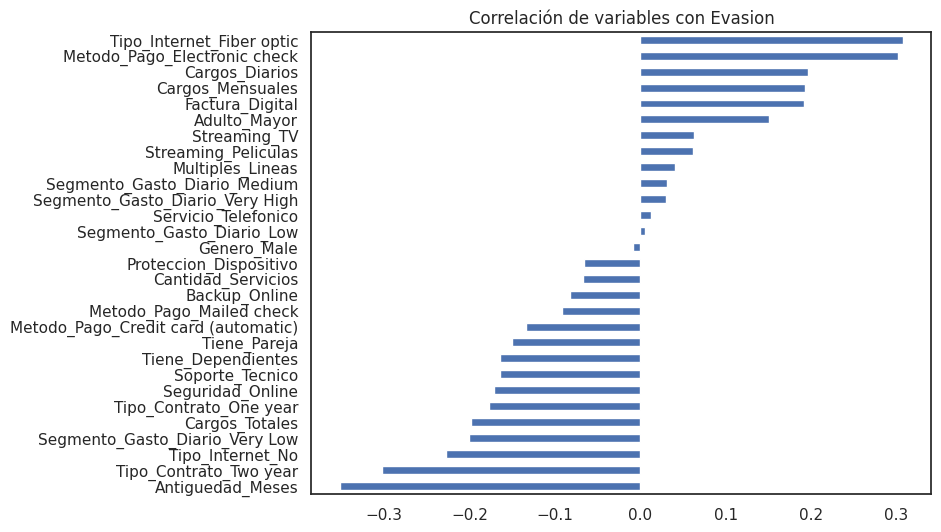

In [114]:
# correlación con Evasion
plt.figure(figsize=(8, 6))
corr.drop('Evasion').sort_values().plot(kind='barh')
plt.title('Correlación de variables con Evasion')
plt.show()

El análisis de correlación revela que la antigüedad del cliente y el tipo de contrato son los factores más fuertemente asociados a la cancelación. Los clientes con contratos de largo plazo presentan menor probabilidad de churn, mientras que aquellos con contrato mensual y pago mediante electronic check muestran mayor riesgo. Asimismo, los clientes con fibra óptica y mayores cargos mensuales presentan mayor propensión a cancelar. Estos hallazgos sugieren que la estrategia de retención debería enfocarse en incentivar contratos de largo plazo y monitorear clientes nuevos con planes de alto costo.

## Análisis Dirigido

### Tiempo de contrato por Cancelación

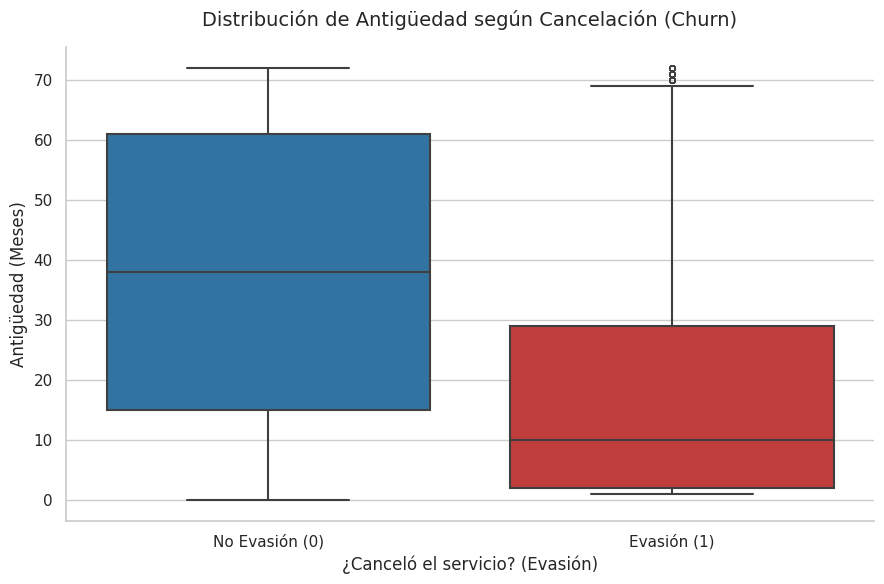

In [115]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(9, 6))

ax = sns.boxplot(
    data=df_model,
    x='Evasion',
    y='Antiguedad_Meses',
    hue='Evasion',
    palette=['#1f77b4', '#d62728'], # Azul para 'No', Rojo para 'Sí'
    linewidth=1.5,
    fliersize=4,      # es el tamaño de los puntos de outliers
    legend=False
)

plt.title('Distribución de Antigüedad según Cancelación (Churn)', fontsize=14, pad=15)
plt.xlabel('¿Canceló el servicio? (Evasión)', fontsize=12)
plt.ylabel('Antigüedad (Meses)', fontsize=12)

plt.xticks([0, 1], ['No Evasión (0)', 'Evasión (1)'])

sns.despine() # eliminamos bordes innecesarios

plt.tight_layout()
plt.show()

Se observa que los clientes que cancelan el servicio presentan, en promedio, menor antigüedad. Esto sugiere que el riesgo de cancelación es mayor en los primeros meses del contrato.

### Gasto total por Cancelación

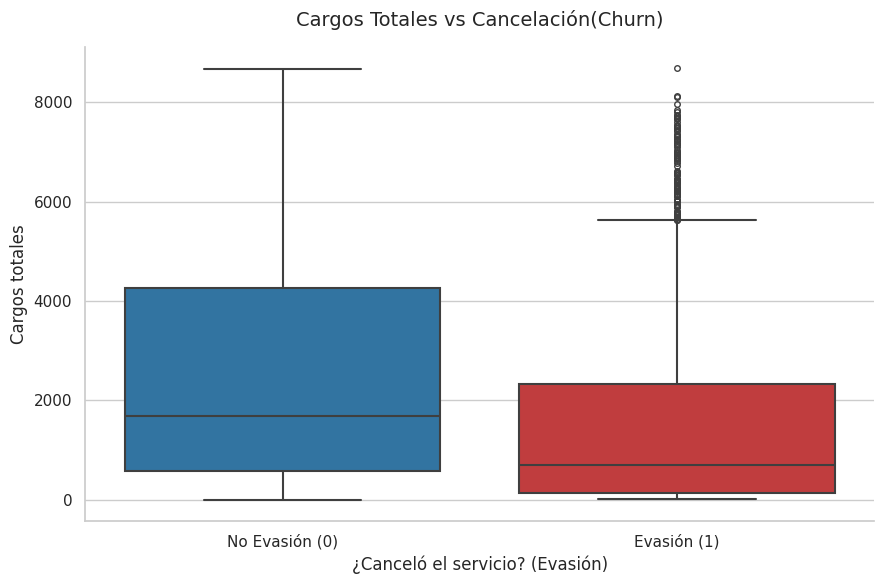

In [116]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(9, 6))

ax = sns.boxplot(
    data=df_model,
    x='Evasion',
    y='Cargos_Totales',
    hue='Evasion',
    palette=['#1f77b4', '#d62728'], # Azul para 'No', Rojo para 'Sí'
    linewidth=1.5,
    fliersize=4,      #  es el tamaño de los puntos de outliers
    legend=False
)

plt.title('Cargos Totales vs Cancelación(Churn)', fontsize=14, pad=15)
plt.xlabel('¿Canceló el servicio? (Evasión)', fontsize=12)
plt.ylabel('Cargos totales', fontsize=12)

plt.xticks([0, 1], ['No Evasión (0)', 'Evasión (1)'])

sns.despine() # Eliminamos bordes innecesarios

plt.tight_layout()
plt.show()

El análisis muestra que los clientes que cancelan el servicio presentan un menor gasto total acumulado en comparación con aquellos que permanecen activos. Esto sugiere que la cancelación tiende a ocurrir en etapas tempranas del ciclo de vida del cliente, antes de que se genere un alto valor acumulado. Por lo tanto, el periodo inicial del contrato representa una etapa crítica para implementar estrategias de retención.

# 🤖 Modelado Predictivo

## Separación de Datos


La división del conjunto de datos en entrenamiento (70%) y prueba (30%) fue realizada previamente como parte del pipeline de preparación para modelado, manteniendo la proporción de la variable objetivo mediante stratify=y

## Creación de Modelos


Para la Regresión Logística, se aplicó estandarización mediante StandardScaler, ya que este modelo se entrena mediante métodos de optimización por gradiente y es sensible a la magnitud de las variables. Cuando existen diferencias significativas en escala por ejemplo, una variable en el rango de 0 a 100,000 (como Cargos_Totales) frente a otra en el rango de 0 a 1, aquellas con mayor magnitud pueden influir desproporcionadamente en el proceso de optimización. La estandarización garantiza que todas las variables contribuyan de manera equilibrada al modelo.

En contraste, Random Forest, al ser un modelo basado en árboles de decisión, no es sensible a la escala de las variables. Su funcionamiento se basa en la búsqueda de puntos de corte óptimos en cada variable, por lo que no depende de distancias ni magnitudes relativas. Por esta razón, no se aplicó escalado a este modelo.

La estandarización se realizó después del proceso de balanceo de clases, asegurando coherencia en el flujo de preprocesamiento.

## Evaluación de los Modelos

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

# Función para obtener métricas

def evaluar_modelo(y_real, y_pred, nombre_modelo):
    print(f'---Evaluación: {nombre_modelo}---')
    print(f'Accuracy: {accuracy_score(y_real, y_pred):.4f}')
    print(f'Precision: {precision_score(y_real, y_pred):.4f}')
    print(f'Recall: {recall_score(y_real, y_pred):.4f}')
    print('\nMatriz de Confusión:')
    print(confusion_matrix(y_real, y_pred))
    print('-'*30)

### Regresión Logística

In [118]:
# Evaluar Regresión Logística
evaluar_modelo(y_test, y_pred_log, 'Regresión Logística (con escalado)')


---Evaluación: Regresión Logística (con escalado)---
Accuracy: 0.7700
Precision: 0.5554
Recall: 0.6702

Matriz de Confusión:
[[1251  301]
 [ 185  376]]
------------------------------


### Random Forest

In [119]:
# Evaluar Random Forest con modelo base
evaluar_modelo(y_test, y_pred_rf, 'Random Forest (sin escalado)')

---Evaluación: Random Forest (sin escalado)---
Accuracy: 0.7648
Precision: 0.5539
Recall: 0.5865

Matriz de Confusión:
[[1287  265]
 [ 232  329]]
------------------------------


In [120]:
# Random Forest sin escalado ajustado el modelo
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=10, # Limitamos la profundidad para evitar Overfitting
                                  n_estimators=200, # Aumentamos de 100 a 200 árboles
                                  random_state=42
                                  )
rf_model.fit(X_train_bal, y_train_bal)

y_pred_rf = rf_model.predict(X_test)

Se realizó un ajuste de hiperparámetros en el modelo Random Forest, limitando la profundidad máxima a 10 y aumentando el número de árboles a 200. Este ajuste tuvo como objetivo reducir el sobreajuste y mejorar la capacidad de generalización del modelo.

In [121]:
# Evaluar Random Forest con modelo ajustado
evaluar_modelo(y_test, y_pred_rf, 'Random Forest (sin escalado) Ajustado')

---Evaluación: Random Forest (sin escalado) Ajustado---
Accuracy: 0.7577
Precision: 0.5334
Recall: 0.6970

Matriz de Confusión:
[[1210  342]
 [ 170  391]]
------------------------------


Tras el ajuste, el recall de la clase de cancelación aumentó de 0.59 a 0.70, lo que representa una mejora significativa en la identificación de clientes en riesgo. Aunque la exactitud global disminuyó ligeramente, el modelo optimizado resulta más adecuado para el problema de churn, donde la detección de clientes que cancelan es prioritaria.